#1. sample_NoNA.csv를 데이터 클렌징 하시오. 

##1-1. 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

path = '/content/drive/MyDrive/인공지능/data/sample_NoNA_modify.csv'
df = pd.read_csv(path)
df

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
227,midsize,19.0,28.0
228,midsize,999.0,29.0
229,midsize,16.0,26.0
230,midsize,18.0,26.0


##1-2. 결측치 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   232 non-null    object 
 1   cty     224 non-null    float64
 2   hwy     227 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


In [5]:
df.isnull().sum()

class    0
cty      8
hwy      5
dtype: int64

## 1-3. 이상치 처리

## 1-3-1. 이상치 확인

In [6]:
df.describe()

,cty,hwy
count,224.000000,227.000000
mean,29.732143,115.986784
std,113.349611,936.111409
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f7ab92e5190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7ab92f0250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ab9276290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ab92f0d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7ab92e5790>,
  <matplotlib.lines.Line2D at 0x7f7ab92e5cd0>]}

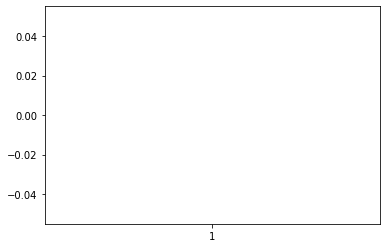

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df['cty'])

> 결측치가 존재하는 경우 boxplot의 범위가 비정상적으로 나타나게 되며 그래프가 그려지지 않는다.

In [8]:
df['cty']
df['cty'].notnull()
#df가 가지고 있는 값중 True인 값만 출력
df[df['cty'].notnull()]
df[df['cty'].notnull()]['cty']

0       18.0
1       21.0
3       21.0
4       16.0
5       18.0
       ...  
227     19.0
228    999.0
229     16.0
230     18.0
231     17.0
Name: cty, Length: 224, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f7ab8dc32d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7ab8dca310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ab8dd2350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ab8dcadd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7ab8dc3850>,
  <matplotlib.lines.Line2D at 0x7f7ab8dc3d90>]}

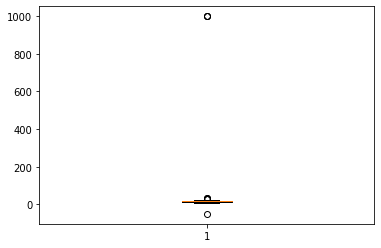

In [9]:
plt.boxplot(df[df['cty'].notnull()]['cty'])

##1-3-2 한계치를 이용한 이상치 확인

In [10]:
notnullData = df[df['cty'].notnull()]['cty']
notnullData

0       18.0
1       21.0
3       21.0
4       16.0
5       18.0
       ...  
227     19.0
228    999.0
229     16.0
230     18.0
231     17.0
Name: cty, Length: 224, dtype: float64

In [11]:
import numpy as np

q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3 - q1
iqr

5.0

In [12]:
lowerfence = q1 - iqr*1.5
lowerfence

6.5

In [13]:
df[df['cty']<lowerfence]

,class,cty,hwy
62,suv,-50.0,15.0


In [14]:
upperfence = q3 + iqr*3
upperfence

34.0

In [15]:
df[df['cty']>upperfence]

,class,cty,hwy
105,subcompact,999.0,36.0
155,midsize,999.0,27.0
219,subcompact,35.0,44.0
228,midsize,999.0,29.0


#1-3-3. 평균 연비 구하기

In [16]:
# lowerfence보다 작은 차는 suv	-50.0	15.0 이러한 값을 갖게 된다.
# 따라서 차종은 suv이고 고속 연비가 15인 차들의 평균 도심 연비를 구하여 값을 치환하자.
# 차종이 suv
df[df['class']=='suv']
# 고속연비가 15
df[df['hwy']==15]
# 차종은 suv이고 고속 연비가 15
df[(df['class']=='suv') & (df['hwy']==15) & (df['cty']>lowerfence)]
# 도심 연비 별도 추출
df[(df['class']=='suv') & (df['hwy']==15) & (df['cty']>lowerfence)]['cty']
# 평균 도심 연비
np.mean(df[(df['class']=='suv') & (df['hwy']==15) & (df['cty']>lowerfence)]['cty'])
# 이상치가 존재해도 이상치가 제거된 중간값이 나타남.
np.median(df[(df['class']=='suv') & (df['hwy']==15)]['cty'])

11.0

## 1-3-4. 이상치 함수 만들기

In [17]:
className = 'suv'
mpg='20'
df1= pd.DataFrame()
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':11,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':-50,
      'hwy':mpg
  }, ignore_index=True)
df1


,class,cty,hwy
0,suv,999.0,20
1,suv,999.0,20
2,suv,11.0,20
3,suv,-50.0,20


In [18]:
#변수 지정
target = 'cty'
upper = 100
lower = 0
#이상치 확인
df1[df1[target]<lower]
df1[df1[target]>upper]
df1[(df1[target]<lower) | (df1[target]>upper)]
#중복데이터 제거
df_drop_duplicates = df1[(df1[target]<lower)|(df1[target]>upper)].drop_duplicates(target)
df_drop_duplicates

,class,cty,hwy
0,suv,999.0,20
3,suv,-50.0,20


In [19]:
mean = 11

for val in df_drop_duplicates[target]:
  #print(val)
  df1[target].replace(val, mean)

df1

,class,cty,hwy
0,suv,999.0,20
1,suv,999.0,20
2,suv,11.0,20
3,suv,-50.0,20


In [20]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
df[(df['class']=='suv') & (df['hwy']==15)]
median = np.median(df[(df['class']=='suv') & (df['hwy']==15)]['cty'])
median
# 이상치 목록

  # lowerfence, upperfence
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1 - iqr * 4.5
upperfence = q1 + iqr * 4.5

df_drop_duplicates = df[(df['class']=='suv') & ((df['cty']<lowerfence) | (df['cty']>upperfence)) ].drop_duplicates('cty')
df_drop_duplicates
# 이상치 치환
for val in df_drop_duplicates['cty']:
  df[(df['class']=='suv') & (df['hwy']==15)] = df[(df['class']=='suv') & (df['hwy']==15)].replace(val, median)

df[(df['class']=='suv') & (df['hwy']==15)]


,class,cty,hwy
19,suv,11.0,15.0
29,suv,11.0,15.0
62,suv,11.0,15.0
129,suv,11.0,15.0
132,suv,11.0,15.0
196,suv,11.0,15.0


In [21]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
# df[(df['class']=='suv') & (df['hwy']==15)]
className = 'suv'
mpg = 15

classCheck = (df['class']==className)
targetCheck = classCheck & (df['hwy']==mpg)

median = np.median(df[targetCheck]['cty'])

# 이상치 목록
gap = 4.5
  # lowerfence, upperfence
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1 - iqr * gap
upperfence = q1 + iqr * gap

# 중복 리스트 제거
fenceCheck = (df['cty']<lowerfence) | (df['cty']>upperfence)
df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates('cty')

# 이상치 치환
for val in df_drop_duplicates['cty']:
  df[targetCheck] = df[targetCheck].replace(val, median)

df[targetCheck]


,class,cty,hwy
19,suv,11.0,15.0
29,suv,11.0,15.0
62,suv,11.0,15.0
129,suv,11.0,15.0
132,suv,11.0,15.0
196,suv,11.0,15.0


In [22]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
# df[(df['class']=='suv') & (df['hwy']==15)]
className = 'suv'
mpg = 15
src = 'hwy'
dest='cty'

classCheck = (df['class']==className)
targetCheck = classCheck & (df[src]==mpg)

median = np.median(df[targetCheck][dest])

# 이상치 목록
gap = 4.5
  # lowerfence, upperfence
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1 - iqr * gap
upperfence = q1 + iqr * gap

# 중복 리스트 제거
fenceCheck = (df[dest]<lowerfence) | (df[dest]>upperfence)
df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates(dest)

# 이상치 치환
for val in df_drop_duplicates[dest]:
  df[targetCheck] = df[targetCheck].replace(val, median)

df[targetCheck]


,class,cty,hwy
19,suv,11.0,15.0
29,suv,11.0,15.0
62,suv,11.0,15.0
129,suv,11.0,15.0
132,suv,11.0,15.0
196,suv,11.0,15.0


In [23]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
# df[(df['class']=='suv') & (df['hwy']==15)]
# className = 'suv'
# mpg = 15
# src = 'hwy'
# dest='cty'
# gap = 4.5

def ConvertAbnormality(df, className, mpg, src, dest, gap):
  classCheck = (df['class']==className)
  targetCheck = classCheck & (df[src]==mpg)

  median = np.median(df[targetCheck][dest])

  # 이상치 목록
    # lowerfence, upperfence
  q1, q3 = np.percentile(notnullData, [25, 75])
  iqr = q3-q1
  lowerfence = q1 - iqr * gap
  upperfence = q1 + iqr * gap

  # 중복 리스트 제거
  fenceCheck = (df[dest]<lowerfence) | (df[dest]>upperfence)
  df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates(dest)

  # 이상치 치환
  for val in df_drop_duplicates[dest]:
    df[targetCheck] = df[targetCheck].replace(val, median)

  return df


In [24]:
df2 = ConvertAbnormality(df,'suv',15,'hwy','cty',4.5)
df2[(df2['class']=='suv') & (df2['hwy']==15)]


,class,cty,hwy
19,suv,11.0,15.0
29,suv,11.0,15.0
62,suv,11.0,15.0
129,suv,11.0,15.0
132,suv,11.0,15.0
196,suv,11.0,15.0


##1-3-5. 이상치 중복 제거

In [25]:
def getFence(gap, data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3-q1
  lowerfence = q1 - iqr * gap
  upperfence = q1 + iqr * gap

  return lowerfence, upperfence

lower, upper = getFence(4.5, df[df['cty'].notnull()]['cty'])
print(lower, ' : ', upper)


-8.5  :  36.5


In [26]:
# 두 dataframe을 하나로 합치기
df_lower = df[df['cty']<lower]
df_upper = df[df['cty']>upper]
df_drop_list = pd.concat([df_lower, df_upper])
df_drop_list

,class,cty,hwy
105,subcompact,999.0,36.0
155,midsize,999.0,27.0
228,midsize,999.0,29.0


In [27]:
# 중복값 제거
df_drop_list = df_drop_list.drop_duplicates(['class', 'cty', 'hwy'])
df_drop_list

,class,cty,hwy
105,subcompact,999.0,36.0
155,midsize,999.0,27.0
228,midsize,999.0,29.0


In [28]:
for idx, row in df_drop_list.iterrows():
  # print(idx, ' : ', row)
  # print(row['class'], ' : ', row['hwy'])
  # df = ConvertAbnormality(df, className, mpg, src, dest, gap)
  df = ConvertAbnormality(df, row['class'], row['hwy'], 'hwy', 'cty', 4.5)
  print(df[(df['class']==row['class']) & (df['hwy']==row['hwy'])])

  # 25, 999
  # 25, -50
  # 데이터가 두 개인 경우 중간값은 평균으로 만들어짐으로
  # 최소값이 lowerfence보다 크다면 최소값을
  # 최대값이 upperfence보다 작다면 최대값을 대표값으로 선정

          class    cty   hwy
104  subcompact   25.0  36.0
105  subcompact  512.0  36.0
       class   cty   hwy
31   midsize  19.0  27.0
108  midsize  18.0  27.0
144  midsize  19.0  27.0
155  midsize  19.0  27.0
178  midsize  21.0  27.0
       class   cty   hwy
34   midsize  18.0  29.0
177  midsize  21.0  29.0
225  midsize  21.0  29.0
226  midsize  18.0  29.0
228  midsize  21.0  29.0


In [29]:
df.describe()['cty']['count']

224.0

In [30]:
def getMedian(df_sample, target, lower, upper):
  # print(df_sample[target])
  # print(df_sample[target].describe())
  # print(df_sample[target].describe()['count'])
  cnt = df_sample[target].describe()['count']

  if cnt<=2:
    # 최소값이 lowerfence보다 크다면 최소값을 
    min = df_sample[target].describe()['min']
    if min > lower:
      # print(min)
      return min
    # 최대값이 upperfence보다 작다면 최대값을 대표값으로 선정
    max = df_sample[target].describe()['max']
    if max < upper:
      # print(max)
      return max
  else:
    # print(df_sample[target].describe()['50%'])
    return df_sample[target].describe()['50%']

# getMedian(df, 'cty')
# df_sample = df[(df['class']=='subcompact') & (df['hwy']==36)]
# df_sample = df[(df['class']=='suv') & (df['hwy']==15)]

lower, upper = getFence(4.5, df[df['cty'].notnull()]['cty'])
df_sample = df[(df['class']=='subcompact') & (df['hwy']==36)]
getMedian(df_sample, 'cty', lower, upper)


25.0

In [31]:
df

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
227,midsize,19.0,28.0
228,midsize,21.0,29.0
229,midsize,16.0,26.0
230,midsize,18.0,26.0


In [35]:
def ConvertAbnormality(df, className, mpg, src, dest, gap, notnullData):
  classCheck = (df['class']==className)
  targetCheck = classCheck & (df[src]==mpg)

  median = np.median(df[targetCheck][dest])

  # 이상치 목록
    # lowerfence, upperfence
  q1, q3 = np.percentile(notnullData, [25, 75])
  iqr = q3-q1
  lowerfence = q1 - iqr * gap
  upperfence = q1 + iqr * gap
  # print(df[targetCheck][dest])
  median = getMedian(df[targetCheck], dest, lowerfence, upperfence)
  # print(median)
  # 중복 리스트 제거
  fenceCheck = (df[dest]<lowerfence) | (df[dest]>upperfence)
  df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates(dest)

  # 이상치 치환
  for val in df_drop_duplicates[dest]:
    df[targetCheck] = df[targetCheck].replace(val, median)

  return df


In [37]:
for idx, row in df_drop_list.iterrows():
  df = ConvertAbnormality(df, row['class'], row['hwy'], 'hwy', 'cty', 4.5)
  print(df[(df['class']==row['class']) & (df['hwy']==row['hwy'])])

TypeError: ignored

#1-3-6 고속연비 확인

In [38]:
#  이상치 확인 - describe
df.describe()

,cty,hwy
count,224.000000,227.000000
mean,19.089286,115.986784
std,33.354208,936.111409
min,9.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,512.000000,9999.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f7ab8b5e990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7ab8b62a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ab8ae9a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ab8ae9550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7ab8b5ef90>,
  <matplotlib.lines.Line2D at 0x7f7ab8b62510>]}

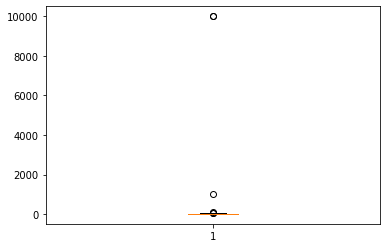

In [39]:
# 2. 이상치 시각화 - boxplot
# df[df['hwy'].notnull()]['hwy']
plt.boxplot(df[df['hwy'].notnull()]['hwy'])


In [40]:
# IRQ
notnullData = df[df['hwy'].notnull()]
notnullData

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
227,midsize,19.0,28.0
228,midsize,21.0,29.0
229,midsize,16.0,26.0
230,midsize,18.0,26.0


In [41]:
lower, upper = getFence(3, notnullData['hwy'])
print(lower, upper)

-12.0 48.0


In [42]:
df_lower = df[df['hwy']<lower]
df_upper = df[df['hwy']>upper]
df_drop_list = pd.concat([df_lower, df_upper])
df_drop_list

,class,cty,hwy
88,pickup,13.0,999.0
124,suv,14.0,99.0
171,compact,20.0,9999.0
206,compact,19.0,9999.0


In [43]:
# 제거 또는 치환 - replace
for idx, row in df_drop_list.iterrows():
  # ConvertAbnormality(df, row['class'], row['cty'], 'cty', 'hwy', 3)
  df = ConvertAbnormality(df, row['class'], row['cty'], 'cty', 'hwy', 3, notnullData['hwy'])
  print(df[(df['class']==row['class']) & (df['cty']==row['cty'])])


     class   cty   hwy
49  pickup  13.0  17.0
65  pickup  13.0  17.0
66  pickup  13.0  17.0
71  pickup  13.0  17.0
84  pickup  13.0  16.0
85  pickup  13.0  16.0
86  pickup  13.0  17.0
88  pickup  13.0  17.0
    class   cty   hwy
18    suv  14.0  20.0
27    suv  14.0  19.0
30    suv  14.0  17.0
76    suv  14.0  17.0
78    suv  14.0  17.0
124   suv  14.0  18.0
126   suv  14.0  19.0
149   suv  14.0  17.0
151   suv  14.0  20.0
176   suv  14.0  17.0
       class   cty   hwy
9    compact  20.0  28.0
168  compact  20.0  25.0
169  compact  20.0  27.0
171  compact  20.0  27.5
       class   cty   hwy
10   compact  19.0  27.0
141  compact  19.0  27.0
170  compact  19.0  25.0
206  compact  19.0  27.0
212  compact  19.0  26.0


#1-4. 결측치

##1-4-1. 결측치 확인

In [45]:
df.isnull().sum()


class    0
cty      8
hwy      5
dtype: int64

In [46]:
df[df['cty'].isnull()]

,class,cty,hwy
2,compact,NaN,31.0
20,suv,NaN,20.0
57,suv,NaN,17.0
92,subcompact,NaN,24.0
99,subcompact,NaN,32.0
136,suv,NaN,17.0
190,compact,NaN,27.0
197,suv,NaN,18.0


In [47]:
# df['class']=='compact'
# df[df['class']=='compact']
# df['hwy']==31
# df[df['hwy']==31]
# (df['class']=='compact') & (df['hwy']==31)
classCompact = df['class']=='compact'
hwy31 = df['hwy']==31
classCompact & hwy31

df[classCompact & hwy31]

,class,cty,hwy
2,compact,NaN,31.0
186,compact,21.0,31.0
187,compact,22.0,31.0


In [48]:
# df[classCompact & hwy31].mean()
# df[classCompact & hwy31].mean()['cty']
df[classCompact & hwy31]['cty'].mean()

21.5

##1-4-2. 결측치 치환

In [49]:
df_sample = df

# 결측치 발생 데이터 추출
classCompact = df_sample['class']=='compact'
hwy31 = df_sample['hwy']==31
classCompact & hwy31

df_sample_Nan = df_sample[classCompact & hwy31]

# 대표값인 평균값 구하기
mean = df_sample_Nan['cty'].mean()
mean

# 치환
df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({'cty':np.nan}, {'cty':mean})
df_sample[classCompact & hwy31]
df_sample

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,21.5,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
227,midsize,19.0,28.0
228,midsize,21.0,29.0
229,midsize,16.0,26.0
230,midsize,18.0,26.0


In [51]:
className = 'compact'
mpg = 31
src = 'hwy'
dst = 'cty'

# 결측치 발생 데이터 추출
classCompact = df_sample['class']==className
hwy31 = df_sample[src]==mpg

df_sample_Nan = df_sample[classCompact & hwy31]

# 대표값인 평균값 구하기
mean = df_sample_Nan[dst].mean()

# 치환
df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({dst:np.nan}, {dst:mean})
df_sample[classCompact & hwy31]

,class,cty,hwy
2,compact,21.5,31.0
186,compact,21.0,31.0
187,compact,22.0,31.0


In [52]:
def ReplaceNaN(df_sample, className, mpg, src, dst):
  # 결측치 발생 데이터 추출
  classCompact = df_sample['class']==className
  hwy31 = df_sample[src]==mpg

  df_sample_Nan = df_sample[classCompact & hwy31]

  # 대표값인 평균값 구하기
  mean = df_sample_Nan[dst].mean()

  # 치환
  df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({dst:np.nan}, {dst:mean})

  return df_sample

df2 = ReplaceNaN(df_sample, 'compact', 31, 'hwy','cty')
df2


,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,21.5,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
227,midsize,19.0,28.0
228,midsize,21.0,29.0
229,midsize,16.0,26.0
230,midsize,18.0,26.0


In [53]:
df_NaN = df[df['cty'].isnull()]
# class, hwy만 가지고 있는 dataframe을 만드시오
df_NaN1 = df_NaN[ ['class', 'hwy'] ]

df_class = df_NaN['class']
df_class

df_hwy = df_NaN['hwy']
df_hwy

# df_NaN = pd.concat([df_class, df_hwy])
# df_NaN

df_NaN_class_hwy = pd.DataFrame()
df_NaN_class_hwy['class'] = df_class

df_NaN_class_hwy['hwy'] = df_hwy
df_NaN_class_hwy

# 중복 데이터 처리
df_NaN_list = df_NaN_class_hwy.drop_duplicates(['class', 'hwy'])
df_NaN_list

,class,hwy
20,suv,20.0
57,suv,17.0
92,subcompact,24.0
99,subcompact,32.0
190,compact,27.0
197,suv,18.0


In [54]:
def getNaNList(df, src, dst):
  # df_NaN = df[df[src].isnull()]
  # df_NaN1 = df_NaN[ ['class', dst] ].drop_duplicates(['class', dst])
  # print(df_NaN1)
  df_NaN = df[df[src].isnull()]
  return df_NaN[ ['class', dst] ].drop_duplicates(['class', dst])

df_NaN_list = getNaNList(df, 'cty', 'hwy')
df_NaN_list


,class,hwy
20,suv,20.0
57,suv,17.0
92,subcompact,24.0
99,subcompact,32.0
190,compact,27.0
197,suv,18.0


In [55]:
for idx, row in df_NaN_list.iterrows():
  # print(row['class'], ' : ', row['hwy'])
  print(row.values[0], ' : ', row.values[1])


suv  :  20.0
suv  :  17.0
subcompact  :  24.0
subcompact  :  32.0
compact  :  27.0
suv  :  18.0


# 결측치 치환

In [56]:
# df.isnull().sum()
df_sample = df

# 도심연비가 결측치인 데이터 치환
# 결측치 목록 읽기
df_NaN_list = getNaNList(df, 'cty', 'hwy')

# 결측치 치환
for idx, row in df_NaN_list.iterrows():
  df_sample = ReplaceNaN(df_sample, row['class'], row['hwy'], 'hwy','cty')

df_sample.isnull().sum()

class    0
cty      0
hwy      5
dtype: int64

In [57]:
# 고속연비가 결측치인 데이터 치환
# 결측치 목록 읽기
df_NaN_list = getNaNList(df, 'hwy', 'cty')

# 결측치 치환
for idx, row in df_NaN_list.iterrows():
  df_sample = ReplaceNaN(df_sample, row['class'], row['cty'],'cty', 'hwy')

df_sample.isnull().sum()

class    0
cty      0
hwy      1
dtype: int64

In [58]:
df_sample[df_sample['hwy'].isnull()]
# df_sample[df_sample['hwy'].isna()]

,class,cty,hwy
200,pickup,17.0,NaN


In [59]:
classCompact = df_sample['class']=='pickup'
hwy31 = df_sample['cty']==17
classCompact & hwy31

df_sample[classCompact & hwy31]

,class,cty,hwy
200,pickup,17.0,NaN


> 특정 데이터 제거

In [60]:
df_test = df_sample[classCompact & hwy31]
df_test.index[0]

200

In [61]:
# df_sample.drop(index=df_test.index[0]).isnull().sum()
df_sample.isnull().sum()

class    0
cty      0
hwy      1
dtype: int64

In [62]:
def ReplaceNaN(df_sample, className, mpg, src, dst):
  # 결측치 발생 데이터 추출
  classCompact = df_sample['class']==className
  hwy31 = df_sample[src]==mpg

  df_sample_Nan = df_sample[classCompact & hwy31]

  # 대표값인 평균값 구하기
  # if np.isnan()
  mean = df_sample_Nan[dst].mean()

  print(mean)

  if np.isnan(mean):
    df_sample = df_sample.drop(index=df_sample_Nan.index[0])
  else:
  # 치환
    df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({dst:np.nan}, {dst:mean})

  return df_sample

In [63]:
df2 = ReplaceNaN(df_sample, 'pickup', 17,'cty', 'hwy')
df2.isnull().sum()

nan


class    0
cty      0
hwy      0
dtype: int64